In [ ]:
#install.packages(c("ggplot2", "car", "lmtest", "MASS", "nortest", "glmnet", "caret"))
library(ggplot2)# Para gráficos
library(car)# Para diagnósticos de regresión (VIF)
library(lmtest)# Para tests de diagnóstico (bptest)
library(MASS)# Para regresión robusta (rlm)
library(nortest)# Para tests de normalidad
library(glmnet)# Para regresión penalizada (Ridge, Lasso, Elastic Net)
library(caret)# Para facilitar el modelado y la evaluación

Installing packages into ‘/home/alvarezg/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message:
“package ‘MASS’ is not available for this version of R
‘MASS’ version 7.3-65 is in the repositories but depends on R (>= 4.4.0)
‘MASS’ version 7.3-65 is in the repositories but depends on R (>= 4.6)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Loading required package: carData

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: Matrix

Loaded glmnet 4.1-10

Loading required package: lattice



In [9]:
# Cargar los datos
datos <- read.csv("StudentsPerformance[1].csv", sep = ",", header = TRUE, stringsAsFactors = FALSE)
head(datos)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [13]:
# Cargar los datos y renombrar las columnas
datos <- read.csv("StudentsPerformance[1].csv", sep = ",", header = TRUE, stringsAsFactors = FALSE)
colnames(datos) <- c(
  "gender",
  "race_ethnicity",
  "parent_education",
  "lunch",
  "test_prep",
  "math_score",
  "reading_score",
  "writing_score"
)

# Convertir variables categóricas a factores
datos <- within(datos, {
  gender <- as.factor(gender)
  race_ethnicity <- as.factor(race_ethnicity)
  parent_education <- as.factor(parent_education)
  lunch <- as.factor(lunch)
  test_prep <- as.factor(test_prep)
})
head(datos)

,gender,race_ethnicity,parent_education,lunch,test_prep,math_score,reading_score,writing_score
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [16]:
summary(datos)

    gender    race_ethnicity           parent_education          lunch    
 female:518   group A: 89    associate's degree:222     free/reduced:355  
 male  :482   group B:190    bachelor's degree :118     standard    :645  
              group C:319    high school       :196                       
              group D:262    master's degree   : 59                       
              group E:140    some college      :226                       
                             some high school  :179                       
     test_prep     math_score     reading_score    writing_score   
 completed:358   Min.   :  0.00   Min.   : 17.00   Min.   : 10.00  
 none     :642   1st Qu.: 57.00   1st Qu.: 59.00   1st Qu.: 57.75  
                 Median : 66.00   Median : 70.00   Median : 69.00  
                 Mean   : 66.09   Mean   : 69.17   Mean   : 68.05  
                 3rd Qu.: 77.00   3rd Qu.: 79.00   3rd Qu.: 79.00  
                 Max.   :100.00   Max.   :100.00   Max.   :100.00  

             Df Sum Sq Mean Sq F value   Pr(>F)    
gender        1   6481    6481   28.98 9.12e-08 ***
Residuals   998 223208     224                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

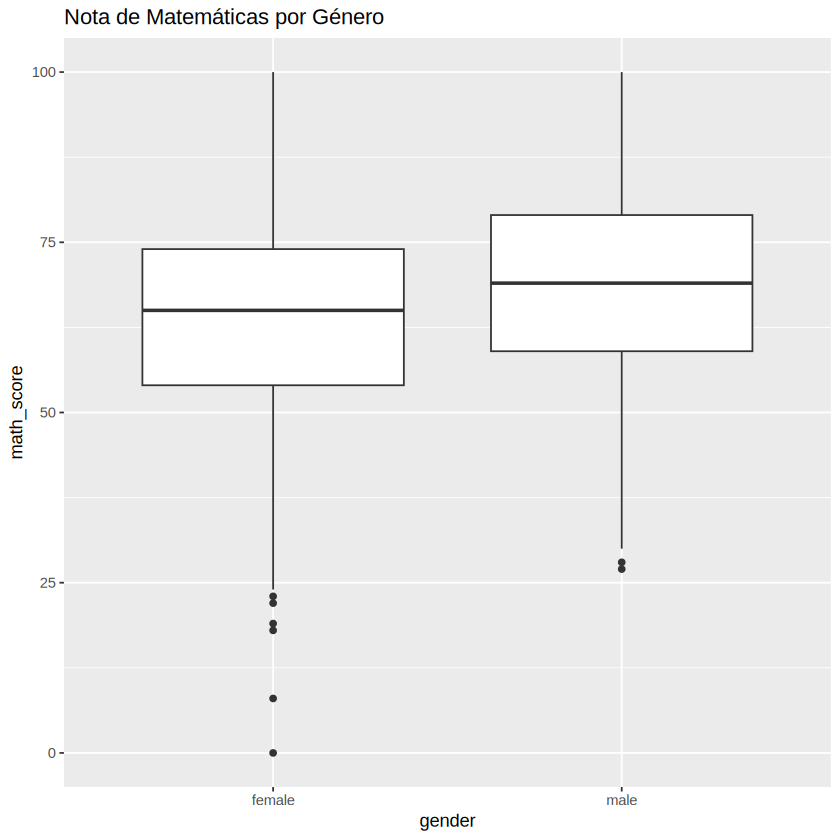

In [ ]:
# Género
ggplot(datos, aes(x = gender, y = math_score)) + geom_boxplot() + ggtitle("Nota de Matemáticas por Género")
summary(aov(math_score ~ gender, data = datos))

                Df Sum Sq Mean Sq F value   Pr(>F)    
race_ethnicity   4  12729    3182   14.59 1.37e-11 ***
Residuals      995 216960     218                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

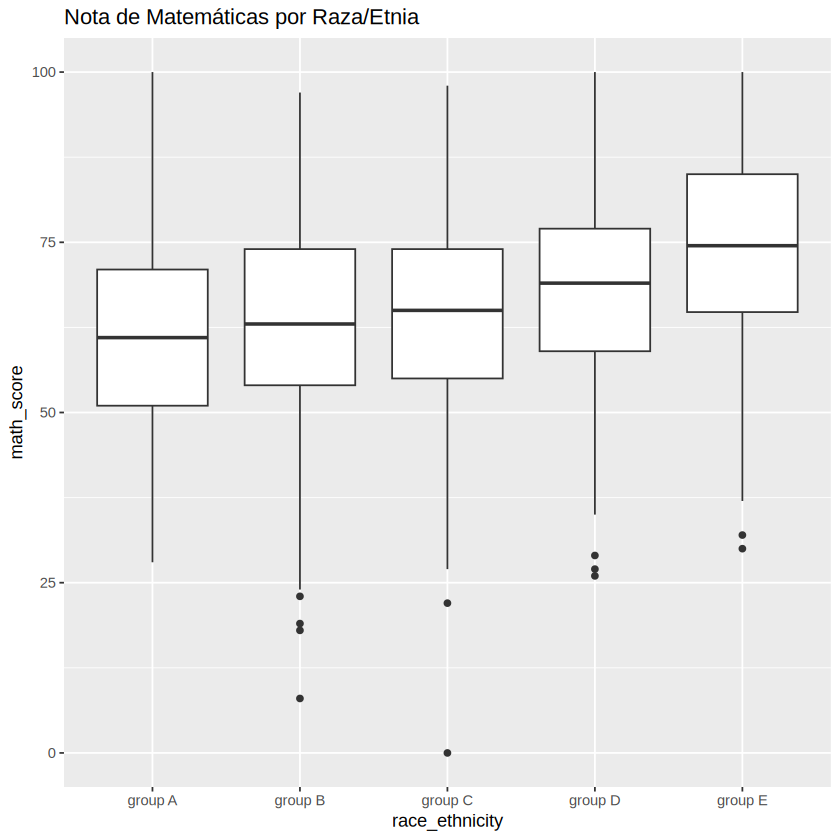

In [18]:
# Raza / Etnia
ggplot(datos, aes(x = race_ethnicity, y = math_score)) + geom_boxplot() + ggtitle("Nota de Matemáticas por Raza/Etnia")
summary(aov(math_score ~ race_ethnicity, data = datos))

                  Df Sum Sq Mean Sq F value   Pr(>F)    
parent_education   5   7296  1459.1   6.522 5.59e-06 ***
Residuals        994 222394   223.7                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

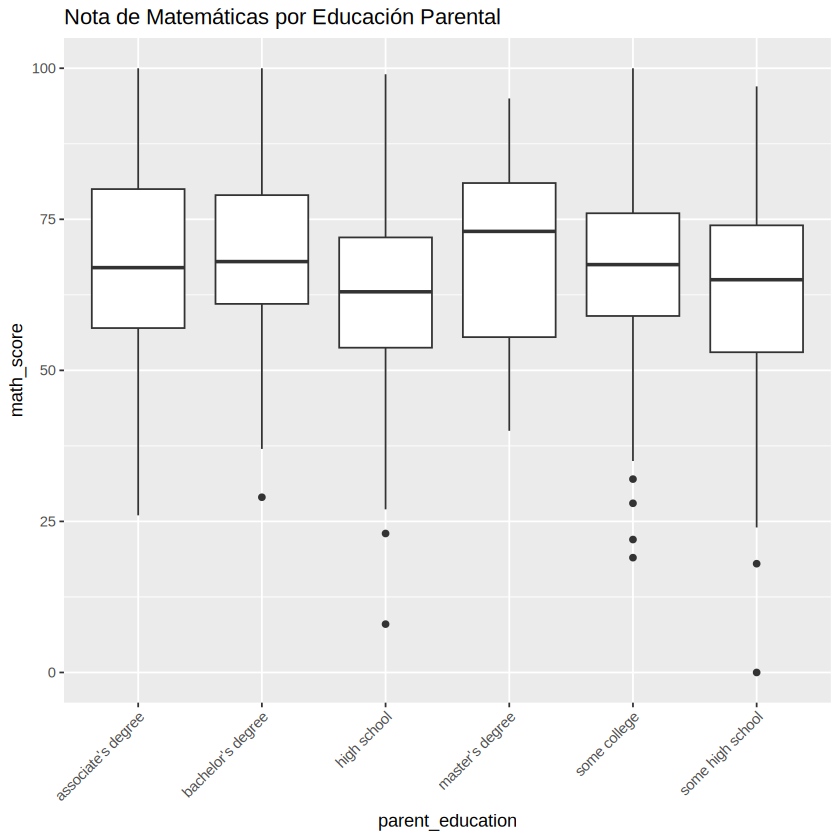

In [19]:
# Educación de los Padres
ggplot(datos, aes(x = parent_education, y = math_score)) + geom_boxplot() + ggtitle("Nota de Matemáticas por Educación Parental") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
summary(aov(math_score ~ parent_education, data = datos))

             Df Sum Sq Mean Sq F value Pr(>F)    
lunch         1  28278   28278   140.1 <2e-16 ***
Residuals   998 201411     202                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

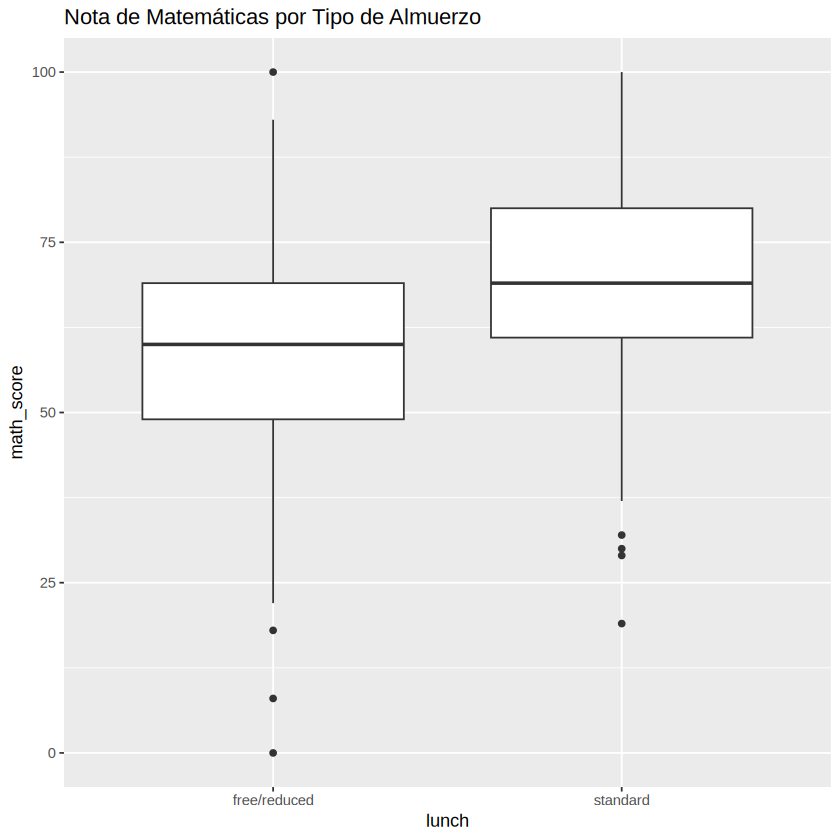

In [ ]:
# Tipo de almuerzo
ggplot(datos, aes(x = lunch, y = math_score)) + geom_boxplot() + ggtitle("Nota de Matemáticas por Tipo de Almuerzo")
summary(aov(math_score ~ lunch, data = datos))

             Df Sum Sq Mean Sq F value   Pr(>F)    
test_prep     1   7253    7253   32.54 1.54e-08 ***
Residuals   998 222436     223                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

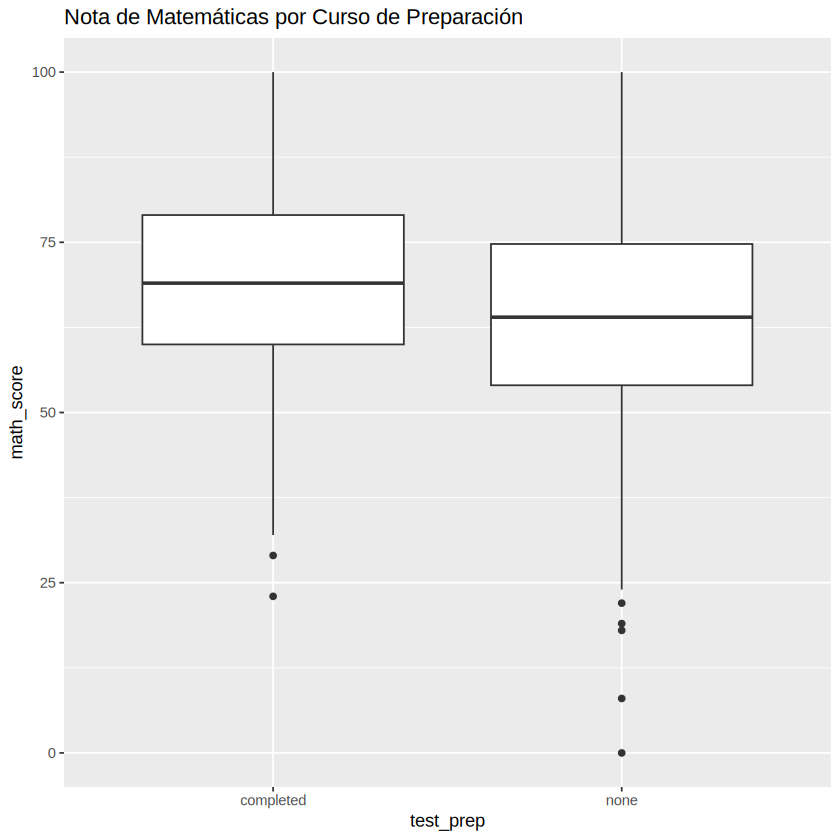

In [21]:
# Curso de Preparación
ggplot(datos, aes(x = test_prep, y = math_score)) + geom_boxplot() + ggtitle("Nota de Matemáticas por Curso de Preparación")
summary(aov(math_score ~ test_prep, data = datos))

In [23]:
# División de los datos en entrenamiento y prueba
set.seed(123) # Para reproducibilidad
train.filas <- createDataPartition(datos$math_score, p = 0.8, list = FALSE)
train.datos <- datos[train.filas, ]
test.datos <- datos[-train.filas, ]

print("Dimensiones del conjunto de entrenamiento:")
print(dim(train.datos))
print("Dimensiones del conjunto de prueba:")
print(dim(test.datos))

[1] "Dimensiones del conjunto de entrenamiento:"
[1] 802   8
[1] "Dimensiones del conjunto de prueba:"
[1] 198   8


In [25]:
modelo_completo <- lm(math_score ~ ., data = train.datos)
modelo_nulo <- lm(math_score ~ 1, data = train.datos)

# Selección Paso a Paso (Stepwise) con AIC
modelo_stepwise <- step(modelo_nulo,
                        scope = list(lower = modelo_nulo, upper = modelo_completo),
                        direction = "both",
                        trace = 1)

# Resumen del modelo final
summary(modelo_stepwise)

Start:  AIC=4377.05
math_score ~ 1

                   Df Sum of Sq    RSS    AIC
+ reading_score     1    126047  61593 3485.6
+ writing_score     1    123134  64507 3522.7
+ lunch             1     21323 166317 4282.3
+ race_ethnicity    4     10268 177373 4339.9
+ test_prep         1      5240 182401 4356.3
+ gender            1      4923 182718 4357.7
+ parent_education  5      6242 181398 4359.9
<none>                          187641 4377.1

Step:  AIC=3485.64
math_score ~ reading_score

                   Df Sum of Sq    RSS    AIC
+ gender            1     26526  35068 3035.9
+ lunch             1      4669  56925 3424.4
+ race_ethnicity    4      2937  58656 3454.5
+ writing_score     1      1557  60037 3467.1
<none>                           61593 3485.6
+ test_prep         1        23  61571 3487.4
+ parent_education  5       409  61184 3490.3
- reading_score     1    126047 187641 4377.1

Step:  AIC=3035.9
math_score ~ reading_score + gender

                   Df Sum of Sq 


Call:
lm(formula = math_score ~ reading_score + gender + writing_score + 
    lunch + race_ethnicity + test_prep + parent_education, data = train.datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.1631  -3.5422   0.0304   3.4917  13.9151 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -11.75917    1.37137  -8.575  < 2e-16 ***
reading_score                       0.22895    0.04743   4.828 1.66e-06 ***
gendermale                         13.34890    0.41491  32.173  < 2e-16 ***
writing_score                       0.74648    0.04930  15.143  < 2e-16 ***
lunchstandard                       2.97286    0.41921   7.092 2.95e-12 ***
race_ethnicitygroup B               0.87264    0.77309   1.129  0.25934    
race_ethnicitygroup C              -0.03744    0.71619  -0.052  0.95832    
race_ethnicitygroup D              -0.30158    0.74423  -0.405  0.68543    
race_ethnicitygroup E               4.73049